In [3]:
import numpy as np 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

* Below method will take dataframe and  column name and replace NaN values with given list .

In [2]:
def replace_nan_with_random_list(df, column, replacement_list):
    nan_indices = df.index[df[column].isna()].tolist()
    num_nans = len(nan_indices)
    random_values = np.random.choice(replacement_list, size=num_nans)
    df.loc[nan_indices, column] = random_values

* Below method will take dataframe and  column name and replace NaN values with non NAN values from that column.
  It will select a random value from non NAN value

In [3]:
def replace_nan_with_existing_val(df, column):
    nan_indices = df.index[df[column].isna()].tolist()
    num_nans = len(nan_indices)
    # check where values are not Nan values , that will make a replacement_list
    value_index = df.index[df[column].notna()].tolist()
    replacement_list = df.loc[value_index,column].values.tolist()
    random_values = np.random.choice(replacement_list, size=num_nans)
    df.loc[nan_indices, column] = random_values

In [4]:
def preprocess_dataframe(numerical_features, categorical_features, df):
    """
    This functions takes a dataframe and takes a list of numerical columns and categorical columns 
    and replaces NAN values and scales the values 
    
    """
    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Fit and transform the data using the preprocessor
    X_preprocessed = preprocessor.fit_transform(df)
    # get output features name 
    feature_names = preprocessor.get_feature_names_out()
    
    return ( X_preprocessed ,feature_names)



In [5]:
def extract_target_column(df,target_col):
    tran_y= df.pop(target_col)
    # type would be pandas.core.series.Series
    type(tran_y)
    y = pd.DataFrame(tran_y)
    y[target_col] = y[target_col].astype(int)
    y = y.values
    y = y.ravel()
    return y

In [12]:
def replace_nan_frequent_val(df, column_name):
    """
    Replace NaN values with the most frequent value in the specified column.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, the name of the column to process
    """
    # Replace NaN values with the most frequent value in the 'column_name' column
    most_frequent_value = df[column_name].mode()[0]
    df[column_name] = df[column_name].fillna(most_frequent_value)



In [1]:
def append_index(index , new_index):
   # Concatenate the new index with the existing index
   combined_index = pd.Index(index.tolist() + new_index.tolist())
    # Assign the new combined index to the DataFrame
   return combined_index

In [20]:
def dump_list_to_file(my_list, file_path):
    """
    Dump a list to a regular text file.

    Parameters:
    - my_list: list, the list to be dumped
    - file_path: str, the path to the output text file
    """
    # Dump the list to a text file
    with open(file_path, 'w') as file:
        for item in my_list:
            file.write(str(item) + '\n')

In [21]:
my_list = [ 1,2,3,4,5]
file_path= 'C:\\Users\\u725561\\machine-learning\\kaggle-learning\\my_list.txt'
dump_list_to_file(my_list,file_path)

In [5]:
data1 = { 'A' : [ 1, 2,3,4 ] , 'B' : [ "B1","B2","B3","B4"] }

In [6]:
data1

{'A': [1, 2, 3, 4], 'B': ['B1', 'B2', 'B3', 'B4']}

In [8]:
import pandas as pd 
df3 = pd.DataFrame(data1)

In [9]:
df3

,A,B
0,1,B1
1,2,B2
2,3,B3
3,4,B4


In [6]:
data = {'A': [1, 2, np.nan, 4, 5, np.nan, 7, 8, 9]}

In [14]:
numerical_features = df3.select_dtypes(include=['int']).columns
categorical_features = df3.select_dtypes(include=['object']).columns

In [15]:
categorical_features

Index(['B'], dtype='object')

In [16]:
numerical_features


Index(['A'], dtype='object')

In [17]:
f = append_index(numerical_features,categorical_features)
f

Index(['A', 'B'], dtype='object')

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,A
0,1.0
1,2.0
2,NaN
3,4.0
4,5.0
5,NaN
6,7.0
7,8.0
8,9.0


In [9]:
# get the NaN index
nan_index = df.index[df.A.isna()].tolist()
len(nan_index)

2

In [10]:
# got the non nan index
value_index = df.index[df.A.notna()].tolist()
len(value_index)

7

In [11]:
replacement_list = df.loc[value_index,'A'].values.tolist()

In [12]:
replacement_list

[1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0]

In [13]:
replace_nan_with_random_list(df,'A',replacement_list=replacement_list)

In [14]:
df

,A
0,1.0
1,2.0
2,7.0
3,4.0
4,5.0
5,5.0
6,7.0
7,8.0
8,9.0


In [15]:
data2 = { 'A' : [ 77 , 88 ,99 , np.nan, 110 , 122, 133, np.nan] }
df2 = pd.DataFrame(data2)
df2

,A
0,77.0
1,88.0
2,99.0
3,NaN
4,110.0
5,122.0
6,133.0
7,NaN


In [16]:
%whos

Variable                        Type         Data/Info
------------------------------------------------------
ColumnTransformer               ABCMeta      <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
LogisticRegression              type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
OneHotEncoder                   type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Pipeline                        ABCMeta      <class 'sklearn.pipeline.Pipeline'>
SimpleImputer                   type         <class 'sklearn.impute._base.SimpleImputer'>
StandardScaler                  type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
accuracy_score                  function     <function accuracy_score at 0x000001E2FF9EC310>
classification_report           function     <function classification_<...>rt at 0x000001E2FFA744C0>
data                            dict         n=1
data2                           dict         n=1
df                     

In [17]:
# replace NAN with existing values in the dataframe 
replace_nan_with_existing_val (df2,'A')

In [18]:
df2

,A
0,77.0
1,88.0
2,99.0
3,77.0
4,110.0
5,122.0
6,133.0
7,77.0


In [19]:
data5 = { 'A' : [ 1, 2,3] , 'B' : [4,5,6] , 'C' : [ 7,8,9] }
data5

{'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}

In [20]:
df3 = pd.DataFrame(data5)

In [21]:
df3

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [22]:
# drop method allows multiple 
df3.drop(columns = [ 'A','B'] ,inplace=True)

In [23]:
df3

,C
0,7
1,8
2,9


In [24]:
data4 = { 'A' : [ 'A1','A2','A3','A4' ] , 'B' : [ 1 ,10 , 1000, np.nan] , 'C' : [ True, False , False , False] }

In [25]:
data4

{'A': ['A1', 'A2', 'A3', 'A4'],
 'B': [1, 10, 1000, nan],
 'C': [True, False, False, False]}

In [26]:
df4 = pd.DataFrame(data4)

In [27]:
df4

,A,B,C
0,A1,1.0,True
1,A2,10.0,False
2,A3,1000.0,False
3,A4,NaN,False


In [28]:
numeric_columns =  ['B']
catergorical_columns = [ 'A','C']
X , feature_names= preprocess_dataframe(numeric_columns,catergorical_columns,df4)

In [29]:
X

array([[-0.82755483,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.80538818,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.63294301,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ]])

In [30]:
X.shape

(4, 7)

In [31]:
feature_names

array(['num__B', 'cat__A_A1', 'cat__A_A2', 'cat__A_A3', 'cat__A_A4',
       'cat__C_False', 'cat__C_True'], dtype=object)

In [32]:
df5 = pd.DataFrame(data = X , columns = feature_names)

In [33]:
df5

,num__B,cat__A_A1,cat__A_A2,cat__A_A3,cat__A_A4,cat__C_False,cat__C_True
0,-0.827555,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.805388,0.0,1.0,0.0,0.0,1.0,0.0
2,1.632943,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
data5

{'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}

In [35]:
df6 = pd.DataFrame(data5)

In [36]:
df6

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [38]:
e = extract_target_column(df6, 'A')

In [39]:
e

array([1, 2, 3])

In [40]:
e = extract_target_column(df6, 'B')

In [41]:
e

array([4, 5, 6])

In [6]:
data = {'A': [1, 2, np.nan, 4, 5, np.nan, 7, 8, 9 , 9]}
df = pd.DataFrame(data)
data


{'A': [1, 2, nan, 4, 5, nan, 7, 8, 9, 9]}

In [7]:
df.value_counts('A')

A
9.0    2
1.0    1
2.0    1
4.0    1
5.0    1
7.0    1
8.0    1
Name: count, dtype: int64

In [8]:
df.mode()


,A
0,9.0


In [10]:
%whos

Variable                Type         Data/Info
----------------------------------------------
ColumnTransformer       ABCMeta      <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
LogisticRegression      type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
OneHotEncoder           type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Pipeline                ABCMeta      <class 'sklearn.pipeline.Pipeline'>
SimpleImputer           type         <class 'sklearn.impute._base.SimpleImputer'>
StandardScaler          type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
accuracy_score          function     <function accuracy_score at 0x000001D14F567820>
classification_report   function     <function classification_<...>rt at 0x000001D14F5739D0>
data                    dict         n=1
df                      DataFrame         A\n0  1.0\n1  2.0\n2<...>0\n7  8.0\n8  9.0\n9  9.0
most_frequent_value     float64      1.0
np                      mo

In [13]:
replace_nan_frequent_val(df,'A')

In [14]:
df

,A
0,1.0
1,2.0
2,9.0
3,4.0
4,5.0
5,9.0
6,7.0
7,8.0
8,9.0
9,9.0


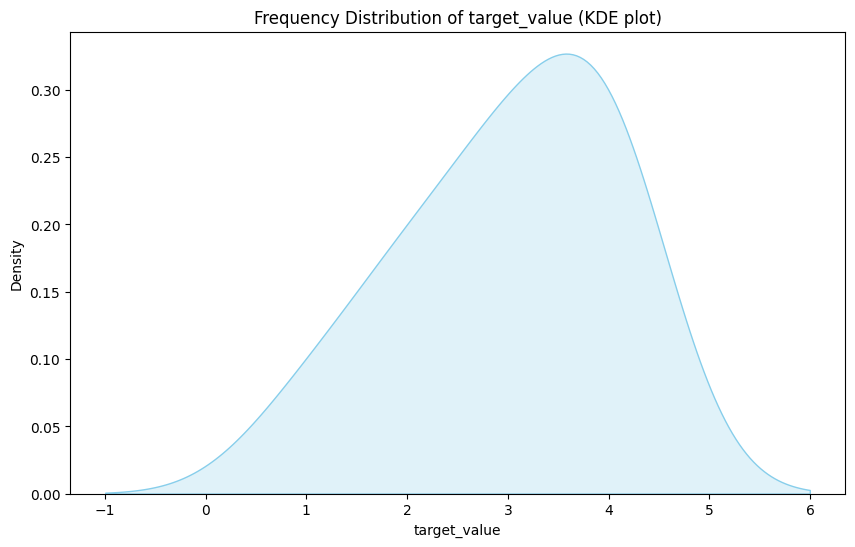

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target_value' is the column you are interested in
# Replace 'target_value' with the actual column name you want to visualize

# Create a sample DataFrame
data = {'target_value': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]}
df = pd.DataFrame(data)

# Visualize the frequency distribution using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='target_value', fill=True, color='skyblue', common_norm=False)
plt.title('Frequency Distribution of target_value (KDE plot)')
plt.xlabel('target_value')
plt.ylabel('Density')
plt.show()